In [1]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
net_file = pd.read_csv("../output_network/network_filtered.csv", sep="\t")
G = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G)

Graph with 511 nodes and 2785 edges


## Loading the labelled message files

In [3]:
import csv

In [4]:
abortion_df = pd.read_csv("../llama_probs/llama_probabilities_full_abortion.csv", sep="\t", encoding="utf-8", quoting=csv.QUOTE_NONE)
marriage_df = pd.read_csv("../llama_probs/llama_probabilities_full_marriage.csv", sep="\t", encoding="utf-8", quoting=csv.QUOTE_NONE)
political_df = pd.read_csv("../llama_probs/llama_probabilities_full_political.csv", sep="\t", encoding="utf-8", quoting=csv.QUOTE_NONE)

In [5]:
abortion_df.shape, marriage_df.shape, political_df.shape

((19939, 13), (13073, 13), (25360, 13))

In [6]:
abortion_df = abortion_df[["user", "text", "topic", "A", "F", "N"]]
marriage_df = marriage_df[["user", "text", "topic", "A", "F", "N"]]
political_df = political_df[["user", "text", "topic", "A", "F", "N"]]
political_df.head()

,user,text,topic,A,F,N
0,InterestingCry1789,"""""""You asked why your views make you right lea...",1,0.000000,0.206324,0.000000
1,truEarth_,"""""""I wouldn't call them the """"""""left"""""""". Pros...",1,0.585185,0.000000,0.000000
2,SomeHomo69,You're not a libertarian,1,0.329407,0.398425,0.272168
3,kevinr_96,That makes sense. Could you elaborate on the l...,1,0.000000,0.000000,1.000000
4,sohmeho,Fuck liberals.,1,1.000000,0.000000,0.000000


In [7]:
political_df[(political_df["A"] == 0.0) & (political_df["F"] == 0.0) & (political_df["N"] == 0.0)]

,user,text,topic,A,F,N
50,TecumsehSherman,"""""""Is """"""""the left"""""""" in the room with you no...",1,0.0,0.0,0.0
72,TheLastDabSauce,"""""""I find the implication that the democrats o...",1,0.0,0.0,0.0
76,Kind-Station9752,"""""""The Republicans overturned roe v wade, are ...",1,0.0,0.0,0.0
85,drslovak,"You do that, and I will continue to refer to t...",1,0.0,0.0,0.0
98,fastolfe00,"""""""I didn't say mainstream Republican. I said ...",1,0.0,0.0,0.0
...,...,...,...,...,...,...
25235,AlienSamuraiNewt,"""""""So many subs have taken a hard-left turn. I...",1,0.0,0.0,0.0
25262,brilliantdoofus85,"""""""I think my point was more that Glenn Youngk...",1,0.0,0.0,0.0
25337,pisstowine,"Jesus Christ, it's a miracle a singularity has...",1,0.0,0.0,0.0
25340,srandrews,"""""""Bear in mind a typical US liberal is pretty...",1,0.0,0.0,0.0


Checking that users are in the graph G

In [8]:
user_nodeid = pd.read_csv("../reddit_22_51/user_nodeid.csv", sep="\t")
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()
abortion_df['nodeid'] = abortion_df['user'].map(user_nodeid_dict) #mapping usernames to node ids
marriage_df['nodeid'] = marriage_df['user'].map(user_nodeid_dict)
political_df['nodeid'] = political_df['user'].map(user_nodeid_dict)

In [9]:
abortion_df_filtered = abortion_df[abortion_df['nodeid'].isin(G.nodes())] #filtering the users to be only those who wrote in all 3 topics (those form the graph)
marriage_df_filtered = marriage_df[marriage_df['nodeid'].isin(G.nodes())]
political_df_filtered = political_df[political_df['nodeid'].isin(G.nodes())]

### Selecting and averaging the stance probabilities 

In [10]:
abortion_df_avg = rfun.get_avg(abortion_df_filtered, "abortion") #getting the stance (from -1 to 1) from the probability
marriage_df_avg = rfun.get_avg(marriage_df_filtered, "marriage")
political_df_avg = rfun.get_avg(political_df_filtered, "political")

In [11]:
marriage_df_avg.shape

(511, 5)

In [12]:
merged_df = rfun.merge_datasets(abortion_df_avg, marriage_df_avg, political_df_avg)
merged_df.shape

(511, 13)

UMAP and PCA on the simulated data

In [13]:
merged_df.head()

,user,A_x,F_x,N_x,stance_abortion,A_y,F_y,N_y,stance_marriage,A,F,N,stance_political
0,-_AirBuddDwyer_-,0.000000,0.000000,1.000000,0.000000,0.389795,0.314452,0.095753,0.389795,0.149971,0.590191,0.019527,-0.590191
1,0m4ll3y,0.000000,0.060795,0.939205,-0.060795,0.000000,0.000000,1.000000,0.000000,0.000000,0.288164,0.328761,-0.288164
2,3720-To-One,0.000000,1.000000,0.000000,-1.000000,0.370153,0.375505,0.254343,-0.375505,0.000000,1.000000,0.000000,-1.000000
3,5eggsEveryday,0.541052,0.140086,0.181419,0.541052,1.000000,0.000000,0.000000,1.000000,0.263140,0.668267,0.000000,-0.668267
4,ABobby077,0.237265,0.000000,0.000000,0.237265,0.488284,0.511716,0.000000,-0.511716,1.000000,0.000000,0.000000,1.000000


In [14]:
merged_df_reduced = rfun.apply_pca(merged_df, column_list = ["stance_political", "stance_abortion", "stance_marriage"], new_columns = ["stance_political_scaled", "stance_abortion_scaled", "stance_marriage_scaled"])
merged_df_reduced = rfun.apply_umap(merged_df, column_list = ["stance_political", "stance_abortion", "stance_marriage"], new_columns = ["stance_political_scaled", "stance_abortion_scaled", "stance_marriage_scaled"])

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [15]:
merged_df_reduced.head()

,user,A_x,F_x,N_x,stance_abortion,A_y,F_y,N_y,stance_marriage,A,F,N,stance_political,stance_political_scaled,stance_abortion_scaled,stance_marriage_scaled,pca_component,umap_component
0,-_AirBuddDwyer_-,0.000000,0.000000,1.000000,0.000000,0.389795,0.314452,0.095753,0.389795,0.149971,0.590191,0.019527,-0.590191,-0.491993,-0.115395,0.529918,0.106153,8.531978
1,0m4ll3y,0.000000,0.060795,0.939205,-0.060795,0.000000,0.000000,1.000000,0.000000,0.000000,0.288164,0.328761,-0.288164,0.162632,-0.219076,-0.156291,-0.197649,1.419901
2,3720-To-One,0.000000,1.000000,0.000000,-1.000000,0.370153,0.375505,0.254343,-0.375505,0.000000,1.000000,0.000000,-1.000000,-1.380230,-1.820800,-0.817342,-2.228761,-5.407261
3,5eggsEveryday,0.541052,0.140086,0.181419,0.541052,1.000000,0.000000,0.000000,1.000000,0.263140,0.668267,0.000000,-0.668267,-0.661219,0.807317,1.604144,1.381135,11.501305
4,ABobby077,0.237265,0.000000,0.000000,0.237265,0.488284,0.511716,0.000000,-0.511716,1.000000,0.000000,0.000000,1.000000,2.954651,0.289238,-1.057132,0.479426,21.926214


#### Saving the user scores in the format needed for the polaization code 

In [16]:
merged_df_reduced['nodeid'] = merged_df_reduced['user'].map(user_nodeid_dict) #mapping usernames to node ids

In [17]:
merged_df_reduced.head()

,user,A_x,F_x,N_x,stance_abortion,A_y,F_y,N_y,stance_marriage,A,F,N,stance_political,stance_political_scaled,stance_abortion_scaled,stance_marriage_scaled,pca_component,umap_component,nodeid
0,-_AirBuddDwyer_-,0.000000,0.000000,1.000000,0.000000,0.389795,0.314452,0.095753,0.389795,0.149971,0.590191,0.019527,-0.590191,-0.491993,-0.115395,0.529918,0.106153,8.531978,1232857
1,0m4ll3y,0.000000,0.060795,0.939205,-0.060795,0.000000,0.000000,1.000000,0.000000,0.000000,0.288164,0.328761,-0.288164,0.162632,-0.219076,-0.156291,-0.197649,1.419901,310655
2,3720-To-One,0.000000,1.000000,0.000000,-1.000000,0.370153,0.375505,0.254343,-0.375505,0.000000,1.000000,0.000000,-1.000000,-1.380230,-1.820800,-0.817342,-2.228761,-5.407261,614035
3,5eggsEveryday,0.541052,0.140086,0.181419,0.541052,1.000000,0.000000,0.000000,1.000000,0.263140,0.668267,0.000000,-0.668267,-0.661219,0.807317,1.604144,1.381135,11.501305,1231148
4,ABobby077,0.237265,0.000000,0.000000,0.237265,0.488284,0.511716,0.000000,-0.511716,1.000000,0.000000,0.000000,1.000000,2.954651,0.289238,-1.057132,0.479426,21.926214,607299


In [18]:
merged_df_reduced["nodeid"]

0      1232857
1       310655
2       614035
3      1231148
4       607299
        ...   
506     715228
507    1211120
508     207263
509     972135
510     153573
Name: nodeid, Length: 511, dtype: int64

##### Polarization code 

In [19]:
pfun.calc_pol4(G, merged_df_reduced, "pca_component")

               user       A_x       F_x       N_x  stance_abortion       A_y  \
0  -_AirBuddDwyer_-  0.000000  0.000000  1.000000         0.000000  0.389795   
1           0m4ll3y  0.000000  0.060795  0.939205        -0.060795  0.000000   
2       3720-To-One  0.000000  1.000000  0.000000        -1.000000  0.370153   
3     5eggsEveryday  0.541052  0.140086  0.181419         0.541052  1.000000   
4         ABobby077  0.237265  0.000000  0.000000         0.237265  0.488284   

        F_y       N_y  stance_marriage         A         F         N  \
0  0.314452  0.095753         0.389795  0.149971  0.590191  0.019527   
1  0.000000  1.000000         0.000000  0.000000  0.288164  0.328761   
2  0.375505  0.254343        -0.375505  0.000000  1.000000  0.000000   
3  0.000000  0.000000         1.000000  0.263140  0.668267  0.000000   
4  0.511716  0.000000        -0.511716  1.000000  0.000000  0.000000   

   stance_political  stance_political_scaled  stance_abortion_scaled  \
0         -0.5

np.float64(15.981984197550009)

In [20]:
pfun.calc_pol4(G, merged_df_reduced, "umap_component")

               user       A_x       F_x       N_x  stance_abortion       A_y  \
0  -_AirBuddDwyer_-  0.000000  0.000000  1.000000         0.000000  0.389795   
1           0m4ll3y  0.000000  0.060795  0.939205        -0.060795  0.000000   
2       3720-To-One  0.000000  1.000000  0.000000        -1.000000  0.370153   
3     5eggsEveryday  0.541052  0.140086  0.181419         0.541052  1.000000   
4         ABobby077  0.237265  0.000000  0.000000         0.237265  0.488284   

        F_y       N_y  stance_marriage         A         F         N  \
0  0.314452  0.095753         0.389795  0.149971  0.590191  0.019527   
1  0.000000  1.000000         0.000000  0.000000  0.288164  0.328761   
2  0.375505  0.254343        -0.375505  0.000000  1.000000  0.000000   
3  0.000000  0.000000         1.000000  0.263140  0.668267  0.000000   
4  0.511716  0.000000        -0.511716  1.000000  0.000000  0.000000   

   stance_political  stance_political_scaled  stance_abortion_scaled  \
0         -0.5

np.float64(131.2101177760432)

### Results:
Polarization on the PCA component: 15.981984197550009 (16.697074410642806) 

Polarization on the UMAP component: 131.2101177760432 (119.47712444892863)

Some plots of the network:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
 
def plot_c_subplot(merged_df, pc_column, color_topics):
    num_plots = len(color_topics)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)
 
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one plot
 
    for i, (color_topic, ax) in enumerate(zip(color_topics, axes)):
        num_users = merged_df.shape[0]
        y_axis = np.random.rand(num_users)
 
        scatter = ax.scatter(merged_df[pc_column], y_axis, c=merged_df[color_topic], cmap='coolwarm')
        cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label(f'{color_topic} stance')
 
        ax.set_xlabel('UMAP component' if pc_column == "umap_component" else 'Principal component')
        if i == 0:
            ax.set_ylabel('Random')  # Label only on first plot
        ax.set_title(f'Scatter plot - {color_topic}')
 
    plt.tight_layout()
    plt.show()

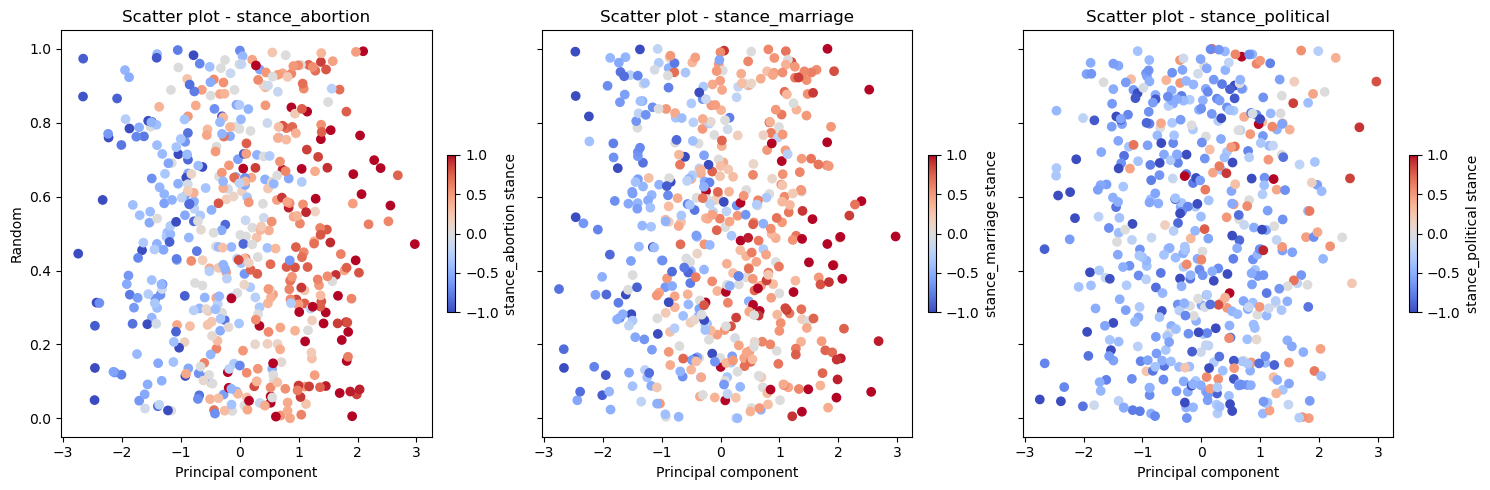

In [22]:
plot_c_subplot(merged_df_reduced, "pca_component", ["stance_abortion", "stance_marriage", "stance_political"])

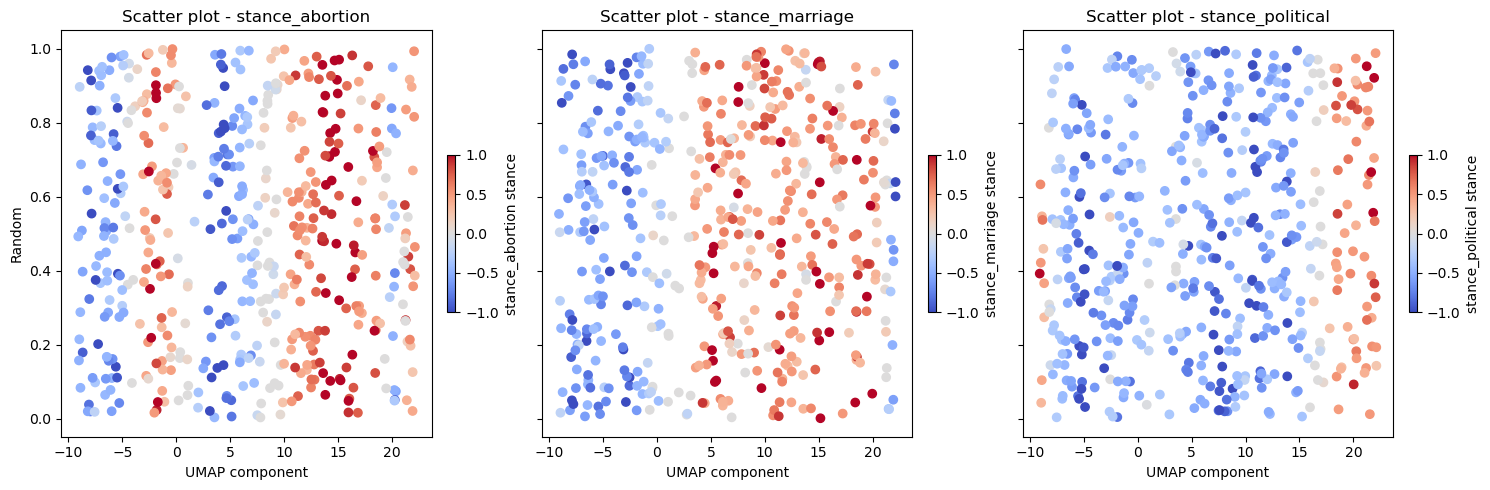

In [23]:
plot_c_subplot(merged_df_reduced, "umap_component", ["stance_abortion", "stance_marriage", "stance_political"])

Dividing pca scores by 2 to get them between -1 and 1 

In [24]:
def scale_pca(row):  
    if row["pca_component"]/2 > 1: 
        return 1 
    elif row["pca_component"]/2 < -1: 
        return -1
    else: 
        return row["pca_component"]/2

In [25]:
merged_df_reduced["pca_component_scaled"] = merged_df_reduced.apply(lambda x: scale_pca(x), axis = 1)

In [26]:
merged_df_reduced

,user,A_x,F_x,N_x,stance_abortion,A_y,F_y,N_y,stance_marriage,A,F,N,stance_political,stance_political_scaled,stance_abortion_scaled,stance_marriage_scaled,pca_component,umap_component,nodeid,pca_component_scaled
0,-_AirBuddDwyer_-,0.000000,0.000000,1.000000,0.000000,0.389795,0.314452,0.095753,0.389795,0.149971,0.590191,0.019527,-0.590191,-0.491993,-0.115395,0.529918,0.106153,8.531978,1232857,0.053077
1,0m4ll3y,0.000000,0.060795,0.939205,-0.060795,0.000000,0.000000,1.000000,0.000000,0.000000,0.288164,0.328761,-0.288164,0.162632,-0.219076,-0.156291,-0.197649,1.419901,310655,-0.098825
2,3720-To-One,0.000000,1.000000,0.000000,-1.000000,0.370153,0.375505,0.254343,-0.375505,0.000000,1.000000,0.000000,-1.000000,-1.380230,-1.820800,-0.817342,-2.228761,-5.407261,614035,-1.000000
3,5eggsEveryday,0.541052,0.140086,0.181419,0.541052,1.000000,0.000000,0.000000,1.000000,0.263140,0.668267,0.000000,-0.668267,-0.661219,0.807317,1.604144,1.381135,11.501305,1231148,0.690567
4,ABobby077,0.237265,0.000000,0.000000,0.237265,0.488284,0.511716,0.000000,-0.511716,1.000000,0.000000,0.000000,1.000000,2.954651,0.289238,-1.057132,0.479426,21.926214,607299,0.239713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,willpower069,0.153552,0.422330,0.375073,-0.422330,0.366140,0.337217,0.280047,0.366140,0.385728,0.486030,0.091363,-0.486030,-0.266230,-0.835639,0.488274,-0.336415,6.105182,715228,-0.168207
507,xtpj,0.559347,0.071841,0.368812,0.559347,1.000000,0.000000,0.000000,1.000000,0.401356,0.546955,0.000000,-0.546955,-0.398283,0.838518,1.604144,1.489108,11.474634,1211120,0.744554
508,yyzjertl,0.000000,0.534807,0.415735,-0.534807,0.208887,0.055431,0.735682,0.208887,0.000000,0.881664,0.118336,-0.881664,-1.123745,-1.027457,0.211441,-0.931047,7.123182,207263,-0.465523
509,ziggystardock,0.107818,0.000000,0.892182,0.107818,0.000000,0.000000,0.083987,0.000000,0.172674,0.179297,0.000000,-0.179297,0.398595,0.068478,-0.156291,0.075754,1.027364,972135,0.037877


In [27]:
# polarization 
pfun.calc_pol4(G, merged_df_reduced, "pca_component_scaled")

               user       A_x       F_x       N_x  stance_abortion       A_y  \
0  -_AirBuddDwyer_-  0.000000  0.000000  1.000000         0.000000  0.389795   
1           0m4ll3y  0.000000  0.060795  0.939205        -0.060795  0.000000   
2       3720-To-One  0.000000  1.000000  0.000000        -1.000000  0.370153   
3     5eggsEveryday  0.541052  0.140086  0.181419         0.541052  1.000000   
4         ABobby077  0.237265  0.000000  0.000000         0.237265  0.488284   

        F_y       N_y  stance_marriage         A         F         N  \
0  0.314452  0.095753         0.389795  0.149971  0.590191  0.019527   
1  0.000000  1.000000         0.000000  0.000000  0.288164  0.328761   
2  0.375505  0.254343        -0.375505  0.000000  1.000000  0.000000   
3  0.000000  0.000000         1.000000  0.263140  0.668267  0.000000   
4  0.511716  0.000000        -0.511716  1.000000  0.000000  0.000000   

   stance_political  stance_political_scaled  stance_abortion_scaled  \
0         -0.5

np.float64(7.731225425426123)

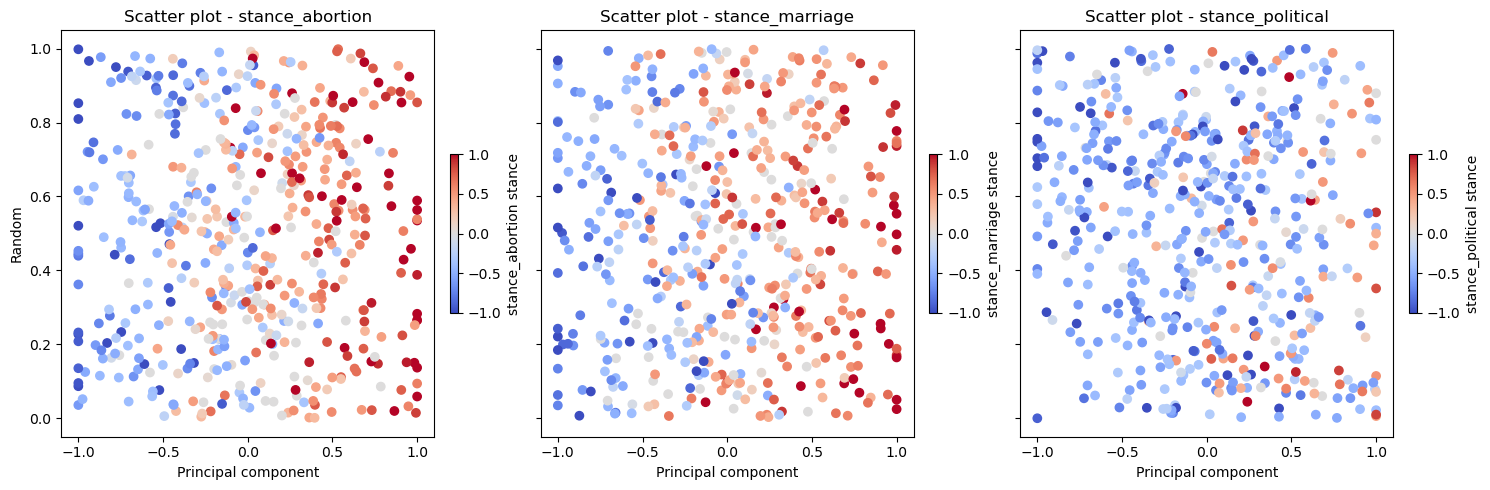

In [28]:
plot_c_subplot(merged_df_reduced, "pca_component_scaled", ["stance_abortion", "stance_marriage", "stance_political"])

## Plots 

In [29]:
#New df with the 2D PCA and UMAP components
merged_df_reduced = rfun.apply_pca2(merged_df_reduced, column_list = ["stance_political", "stance_abortion", "stance_marriage"], new_columns = ["stance_political_scaled", "stance_abortion_scaled", "stance_marriage_scaled"], n_components=2)
merged_df_reduced = rfun.apply_umap2(merged_df_reduced, column_list = ["stance_political", "stance_abortion", "stance_marriage"], new_columns = ["stance_political_scaled", "stance_abortion_scaled", "stance_marriage_scaled"], n_components=2)

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


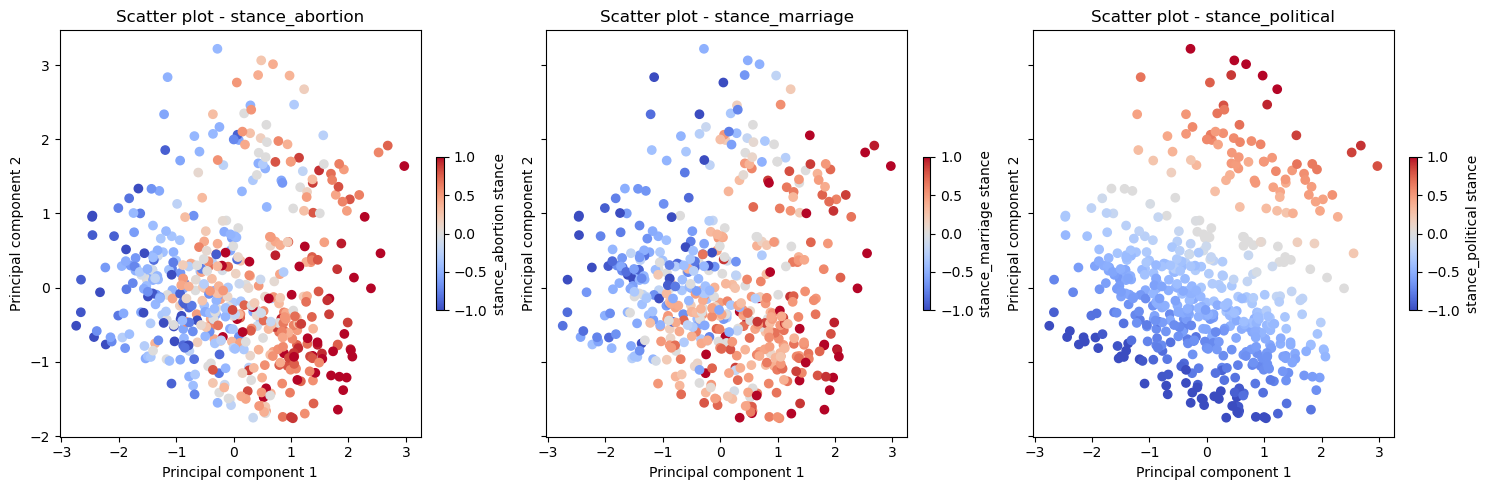

In [30]:
rfun.plot_c_subplot2D(merged_df_reduced, "pca_component1", "pca_component2", ["stance_abortion", "stance_marriage", "stance_political"])

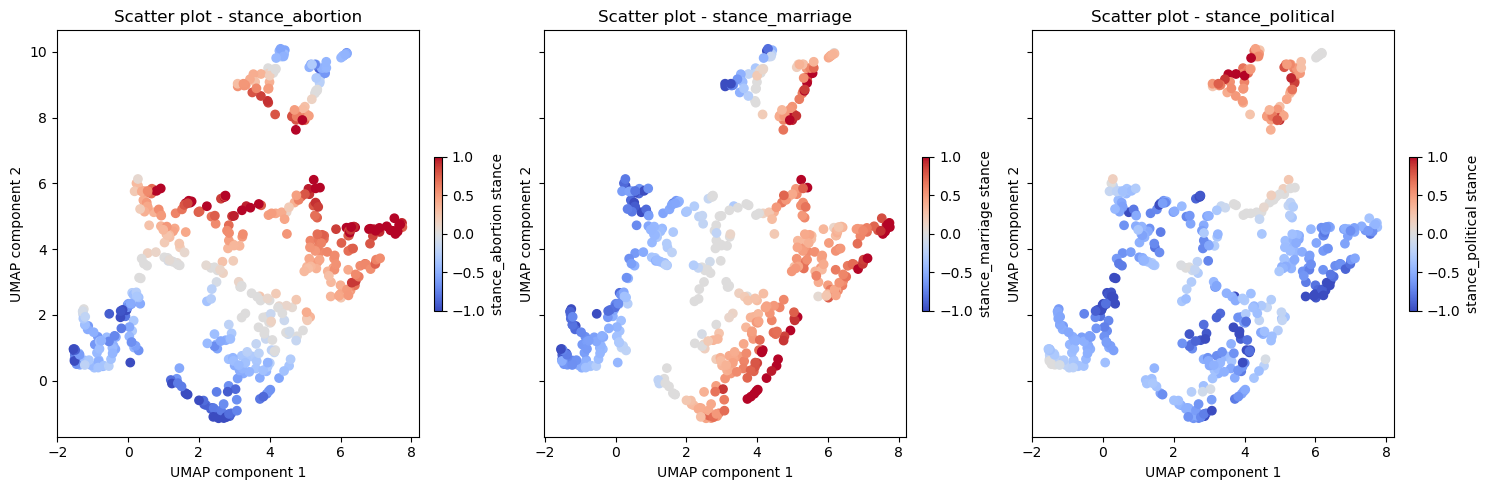

In [31]:
rfun.plot_c_subplot2D(merged_df_reduced, "umap_component1", "umap_component2", ["stance_abortion", "stance_marriage", "stance_political"])

In [32]:
def scale_pca(row, component_name):  
    if row[component_name]/2 > 1: 
        return 1 
    elif row[component_name]/2 < -1: 
        return -1
    else: 
        return row[component_name]/2

In [33]:
merged_df_reduced["pca1_scaled"] = merged_df_reduced.apply(lambda x: scale_pca(x, "pca_component1"), axis=1)
merged_df_reduced["pca2_scaled"] = merged_df_reduced.apply(lambda x: scale_pca(x, "pca_component2"), axis=1)

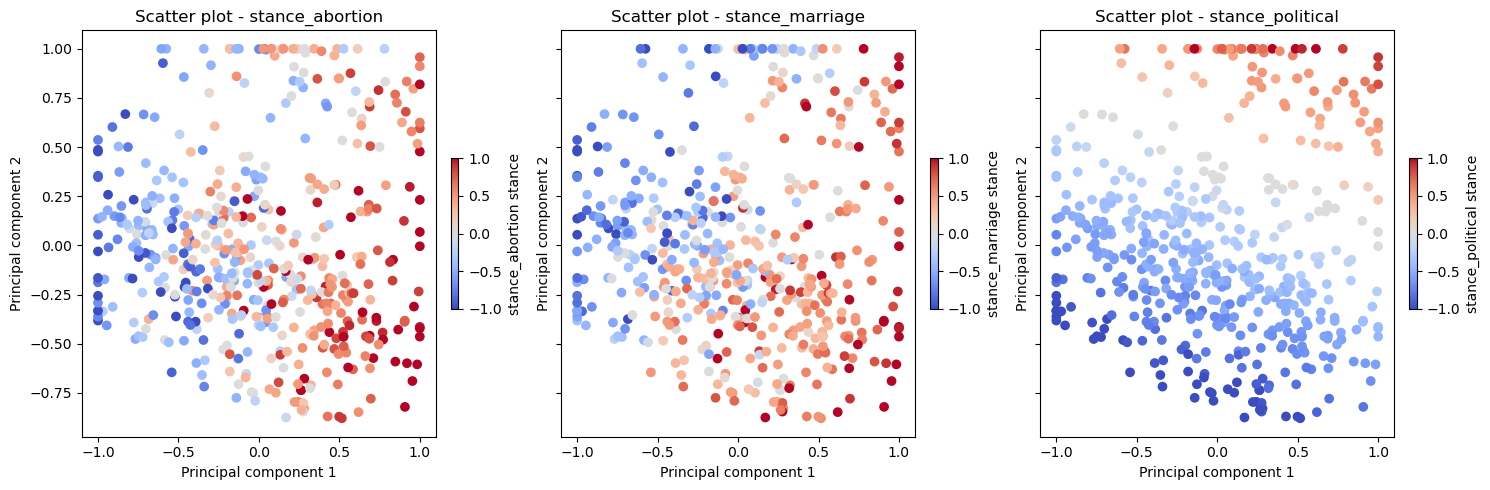

In [34]:
#redoing the pca plots, but reduced
rfun.plot_c_subplot2D(merged_df_reduced, "pca1_scaled", "pca2_scaled", ["stance_abortion", "stance_marriage", "stance_political"])

In [35]:
merged_df_reduced

,user,A_x,F_x,N_x,stance_abortion,A_y,F_y,N_y,stance_marriage,A,...,pca_component,umap_component,nodeid,pca_component_scaled,pca_component1,pca_component2,umap_component1,umap_component2,pca1_scaled,pca2_scaled
0,-_AirBuddDwyer_-,0.000000,0.000000,1.000000,0.000000,0.389795,0.314452,0.095753,0.389795,0.149971,...,0.106153,8.531978,1232857,0.053077,0.106153,-0.613610,3.904694,1.937064,0.053077,-0.306805
1,0m4ll3y,0.000000,0.060795,0.939205,-0.060795,0.000000,0.000000,1.000000,0.000000,0.000000,...,-0.197649,1.419901,310655,-0.098825,-0.197649,0.234191,2.497742,2.999835,-0.098825,0.117096
2,3720-To-One,0.000000,1.000000,0.000000,-1.000000,0.370153,0.375505,0.254343,-0.375505,0.000000,...,-2.228761,-5.407261,614035,-1.000000,-2.228761,-0.764995,-0.043793,2.145705,-1.000000,-0.382498
3,5eggsEveryday,0.541052,0.140086,0.181419,0.541052,1.000000,0.000000,0.000000,1.000000,0.263140,...,1.381135,11.501305,1231148,0.690567,1.381135,-1.250613,7.000301,3.626622,0.690567,-0.625306
4,ABobby077,0.237265,0.000000,0.000000,0.237265,0.488284,0.511716,0.000000,-0.511716,1.000000,...,0.479426,21.926214,607299,0.239713,0.479426,3.062351,3.527109,9.234932,0.239713,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,willpower069,0.153552,0.422330,0.375073,-0.422330,0.366140,0.337217,0.280047,0.366140,0.385728,...,-0.336415,6.105182,715228,-0.168207,-0.336415,-0.284196,3.126308,0.469235,-0.168207,-0.142098
507,xtpj,0.559347,0.071841,0.368812,0.559347,1.000000,0.000000,0.000000,1.000000,0.401356,...,1.489108,11.474634,1211120,0.744554,1.489108,-1.009048,7.115879,3.720791,0.744554,-0.504524
508,yyzjertl,0.000000,0.534807,0.415735,-0.534807,0.208887,0.055431,0.735682,0.208887,0.000000,...,-0.931047,7.123182,207263,-0.465523,-0.931047,-0.970156,2.614846,1.201839,-0.465523,-0.485078
509,ziggystardock,0.107818,0.000000,0.892182,0.107818,0.000000,0.000000,0.083987,0.000000,0.172674,...,0.075754,1.027364,972135,0.037877,0.075754,0.413225,2.597942,3.372213,0.037877,0.206613


In [38]:
## FINAL DF OF DATA
merged_df_reduced.to_csv("../output_network/stance_df_december.csv", sep="\t")

In [37]:
merged_df_reduced.columns

Index(['user', 'A_x', 'F_x', 'N_x', 'stance_abortion', 'A_y', 'F_y', 'N_y',
       'stance_marriage', 'A', 'F', 'N', 'stance_political',
       'stance_political_scaled', 'stance_abortion_scaled',
       'stance_marriage_scaled', 'pca_component', 'umap_component', 'nodeid',
       'pca_component_scaled', 'pca_component1', 'pca_component2',
       'umap_component1', 'umap_component2', 'pca1_scaled', 'pca2_scaled'],
      dtype='object')